## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

# Mert Can Köseoğlu 2220356055



## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.

    In this assignment, the Perceptron Learning Algorithm is implemented from scratch for a binary classification task using the Banknote Authentication Dataset. The purpose is to train a perceptron model to classify banknotes as either class 0(authentic) or class 1(fake). The model’s performance using metrics such as accuracy, F1 score, recall, and precision, and the decision boundary generated by the Perceptron is visualized in two dimensions.

    This task supplies hands-on experience with a foundational machine learning algorithm, focusing on comprehending its implementation, performance review, and how its decision boundary adapts to data factors.

* Description of the dataset used for analysis.

    The Banknote Authentication Dataset contains 1,372 samples with 4 features: variance, skewness, kurtosis, and entropy. They are derived from banknote images. Each sample is labeled as class 1 (authentic) or class 0 (fake), making it suitable for binary classification with the Perceptron.


In [1]:
## Import necessary libraries
!pip install pandas numpy ucimlrepo
import pandas as pd
import numpy as np

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
# Features and target variables
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [3]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

# Convert the DataFrames to NumPy arrays
X_arr = X.to_numpy()  # X Features: all columns without the last column
y_arr = y.to_numpy().flatten()   # y Target: last column



In [4]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
print("\nFeatures: \n", X_arr[:5]) # print the Features as a list
print("Target variable:", y_arr[:5]) # print the name of target column

# Summary statistics
print("\nSummary statistics:")

print("\nFor features:")
print(X.describe())
print("\nFor target:")
print(y.describe())

# Check for missing values
missing_values = X.isnull().sum() # sum of missing values for each column
print("\nMissing values per each feature:")
print(missing_values)

# If missing values are found,
# they can be filled with column means
if missing_values.any():
    X.fillna(X.mean(), inplace=True) # .fillna to fill the missing values
    print("\nMissing values filled with column means in the features.")
else:
    print("\nThere is no missing values in the features.")

missing_values = y.isnull().sum() # sum of missing values for each column
print("\nMissing values for target:")
print(missing_values)

if missing_values.any():
    y.fillna(y.mean(), inplace=True) # .fillna to fill the missing values
    print("\nMissing values filled with column means in the target.")
else:
    print("\nThere is no missing values in the target.")


Features: 
 [[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]]
Target variable: [0 0 0 0 0]

Summary statistics:

For features:
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

For target:
             class
count  1372.000000
mean      0.444606
std       0.497103
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

Missing values per 

In [5]:
# Convert the DataFrame to a Numpy array

# Return the dimensions of the feature(X) and target(y) arrays
print("Features shape:", X_arr.shape)
print("Target shape:", y_arr.shape)

# Return the first five rows of X and first five variable of y
print("Features (X):\n", X_arr[:5])
print("Target (y):\n", y_arr[:5])

Features shape: (1372, 4)
Target shape: (1372,)
Features (X):
 [[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]]
Target (y):
 [0 0 0 0 0]


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

Since the Perceptron algorithm is sensitive to the scale of features, standardization is applied to confirm all features contribute equally to the model. The dataset is split into training and test sets to evaluate the model’s performance on unseen data. These steps are crucial for enhancing model accuracy, stability, and interpretability when implementing the Perceptron for binary classification.


#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [6]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

# Classification commonly tasks often perform better with standardized features.
# It is ideal for this dataset since algorithms like SVM and logistic regression.
# Standardization is scaled the features to a mean of 0 and standard deviation of 1.
# This helps avoiding biases from features with larger scales.

# Data can be standartized using scikit-learn
from sklearn.preprocessing import StandardScaler

# Standartize the featuers
scaler = StandardScaler().fit(X_arr)
rescaledX = scaler.transform(X_arr)

# Return the first few rows of the scaled data
print("Scaled features (first 5 rows):\n", rescaledX[:5])


Scaled features (first 5 rows):
 [[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 [ 1.06374236  1.29547754 -1.25539712 -1.14402883]
 [-0.03677175 -1.0870383   0.73673042  0.09658697]]


#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.

    Evaluating only training data can lead to overly optimistic outcomes and overfitting, as the model may learn patterns that do not generalize sufficiently to new data. Considering the model on a validation set provides insight into its performance on unseen data, helping to measure its capacity to generalize to real-world scenarios. A validation set allows for fine-tuning model parameters and selecting the best algorithms, guaranteeing the model performs well beyond the training data.
  

2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

    Evaluating the model on unseen data is critical for assessing its generalization capability because it simulates real-world situations where the model encounters new data it has not been trained on. This evaluation indicates how well the model can apply learned patterns to different datasets, guaranteeing that it is not only memorizing the training data but is capable of making accurate predictions across diverse scenarios. By analyzing performance metrics on unseen data, we can identify potential weaknesses and refine the model to enhance its robustness and reliability in practical applications.

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y_arr, test_size=test_size, random_state=seed)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

The Perceptron Learning Algorithm is ideal for the Banknote Authentication Dataset due to its binary classification nature and efficient handling of linearly separable data. It supplies insights into supervised learning and decision boundaries in classification tasks, making it an appropriate choice for 1,372 samples.

In [8]:
## Implement Percepton Learning Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.n_iter = n_iter                  # Number of iterations for training
        self.weights = None                   # Initialize weights
        self.bias = None                      # Initialize bias

    def fit(self, X, y):
        n_samples, n_features = X.shape       # Get the number of samples and features
        self.weights = np.zeros(n_features)   # Initialize weights to zeros
        self.bias = 0                          # Initialize bias to zero

        # Training process
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias  # Calculate linear output
                y_predicted = self.activation_function(linear_output)    # Apply activation function
                update = self.learning_rate * (y[idx] - y_predicted)    # Calculate weight update
                self.weights += update * x_i                             # Update weights
                self.bias += update                                       # Update bias

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)  # Activation function: step function

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias  # Calculate linear output for predictions
        return self.activation_function(linear_output)         # Return predictions

Discuss how the choice of learning rate and the number of epochs might affect the training process. What happens with a very small or very large learning rate?

The choice of learning rate and number of iterations is crucial for training the Perceptron model. A small rate allows fine-grained updates, while a large rate speeds up convergence. The number of epochs should be balanced to avoid underfitting or overfitting. Techniques like learning rate scheduling or adaptive learning rates can improve the training process.

In [9]:
# Accuracy implementation

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
     # Ensure the input is in the form of NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Count the number of correct predictions
    correct_predictions = np.sum(y_true == y_pred)

    # Calculate the accuracy
    accuracy = correct_predictions / len(y_true)

    return accuracy

#### Train the Perceptron

In [10]:
## Train the Perceptron model on the training set.
# Create an instance of the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iter=100)

# Fit the model on the training data
perceptron.fit(X_train, y_train)  # Train the model

#### Prediction on Training Data

In [11]:
# Predicting on the training data

# Make predictions on the training data
y_pred_train = perceptron.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = calculate_accuracy(y_train, y_pred_train)

# Print training accuracy
print("Training Accuracy:", train_accuracy)  # Display training accuracy

Training Accuracy: 0.9881494986326345


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [12]:
## Evaluate the model's performance on the test set by calculating accuracy.
# Make predictions on the test data
test_predictions = perceptron.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = calculate_accuracy(y_test, test_predictions)

print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9854545454545455


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?

    Accuracy indicates the overall correctness of the model by calculating the ratio of correct predictions to the total predictions. It provides a basic idea of how often the model is getting the predictions right. Accuracy is particularly informative in balanced datasets, where each class has roughly the same number of instances, and when both types of misclassification errors are equally problematic.

2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

    In imbalanced datasets, accuracy can be misleading because it doesn’t capture the model’s performance on minority classes. A model can achieve high accuracy by predicting only the majority class while failing to identify the minority class altogether, even though the minority class might be the most critical to detect.

In [13]:
def calculate_metrics(y_true, y_pred):
    # Ensure the input is in the form of NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate accuracy
    accuracy = calculate_accuracy(y_train, y_pred_train)

    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Calculate recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9881494986326345
Training Precision: 0.9936974789915967
Training Recall: 0.979296066252588
Training F1 Score: 0.9864442127215851


# Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example scenario where high precision is desirable but low recall might be acceptable.

  Precision is more meaningful in cases where the cost of a false positive is significant. Precision is essential in COVID-19 testing, as high false positives can bring on unnecessary quarantines, anxiety, and resource strain. Prioritizing precision ensures that only infected people are classified as positive, even if it results in lower recall of actual cases.

2. In what cases is recall more critical? Discuss an example where missing true positives is more harmful than having false positives.

  The recall is more critical in cases where failing to identify true positives can have severe consequences. It is crucial in cancer screening, as missing a diagnosis can lead to delayed treatment, worsening health, and potentially fatal outcomes. High recall is essential to avoid false positives, ensuring early detection for effective treatment and patient survival.

3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.

  The F1 score is a more accurate measurement than accuracy in datasets with imbalanced classes. It balances precision and recall, ensuring a model accurately identifies true positives and minimizes false positives. Balancing these metrics is critical for informed conclusions in medical diagnosis, as high recall or precision can have essential implications.

4. What are the limitations of using F1 score alone?

  The F1 score balances precision and recall but doesn't differentiate between them, and doesn't account for true negative rate, potentially underestimating performance in cases where true negatives are crucial.



### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

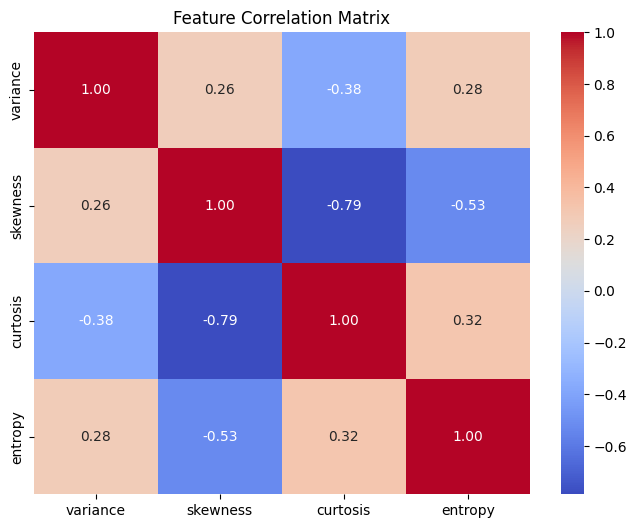

In [14]:
# Compute the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [15]:
# Select two features
# Select these features from the original feature set
# correlation of skewness and curtosis is -0.79
# -0.79 is the lowest correlation
selected_features = X[['skewness', 'curtosis']]
target = y['class']

# Split the selected features into training and validation sets if not done yet
X_train2d, X_val2d, y_train2d, y_val2d = train_test_split(selected_features, target, test_size=test_size, random_state=seed)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [16]:
## Train the Perceptron model on the training set.
perceptron2d = Perceptron(learning_rate=0.01, n_iter=100)
perceptron2d.fit(X_train2d.values, y_train2d.values)

# Predicting on the training data
y_train_pred2d = perceptron2d.predict(X_train2d.values)
accuracy_train = calculate_accuracy(y_train2d, y_train_pred2d)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.7657247037374658


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

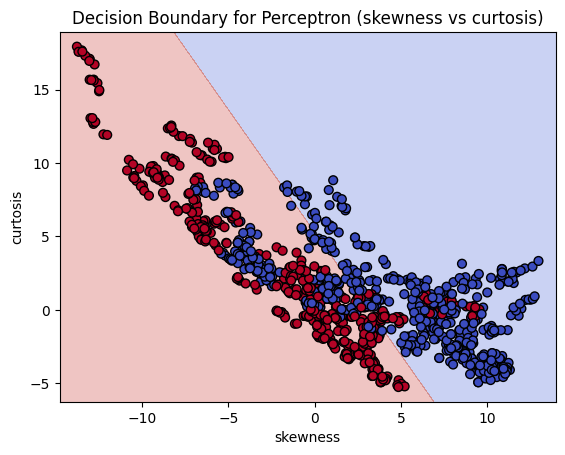

In [17]:
def plot_decision_boundary(X, y, model):
    # Define the range for the plot based on the feature values
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and predict class labels
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')
    plt.xlabel("skewness")
    plt.ylabel("curtosis")
    plt.title('Decision Boundary for Perceptron (skewness vs curtosis)')
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train2d, y_train2d, perceptron2d)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?

    The decision boundary can significantly change based on the feature pairs selected, as different features capture different aspects of the data distribution. For instance, a feature pair like 'skewness' and 'variance' can provide a clear decision boundary with high training accuracy, indicating an effective separation between classes. Conversely, features like 'entropy' and 'curtosis' may not differentiate between classes, leading to ambiguous or overlapping decision boundaries.

2. Can you find a pair of features that leads to better separation between the two classes?

    Yes, the featured pair 'skewness' - 'variance' has the best accuracy, achieving a training accuracy of 0.8605, indicating superior class separation. Other combinations like 'variance' - 'entropy' and 'skewness' - 'curtosis' offer moderate accuracy but not the same level of class separation, suggesting the use of 'skewness' - 'variance' for better classification results. Therefore, utilizing 'skewness' - 'variance' is recommended for better classification results.

Training Accuracy with features ['skewness', 'variance']: 0.8605287146763901



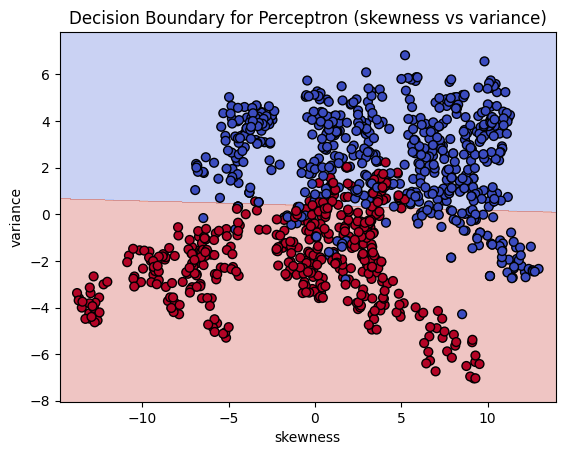




Training Accuracy with features ['variance', 'entropy']: 0.8085688240656336



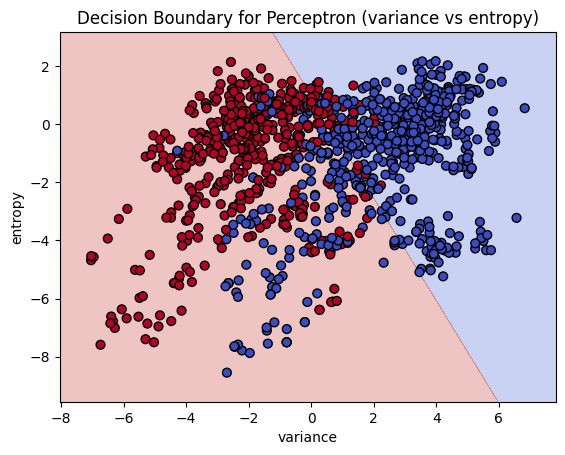




Training Accuracy with features ['entropy', 'curtosis']: 0.4813126709206928



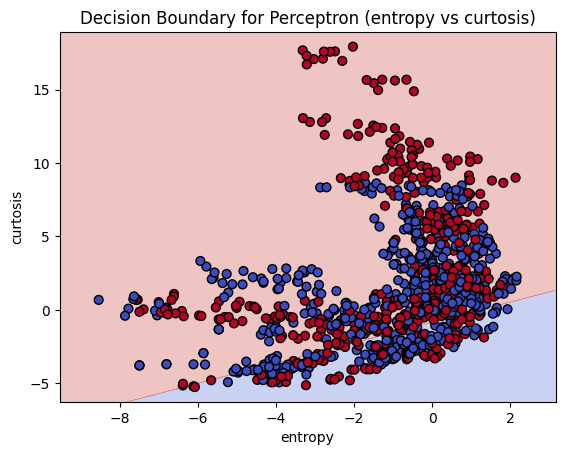




Training Accuracy with features ['variance', 'curtosis']: 0.7392889699179581



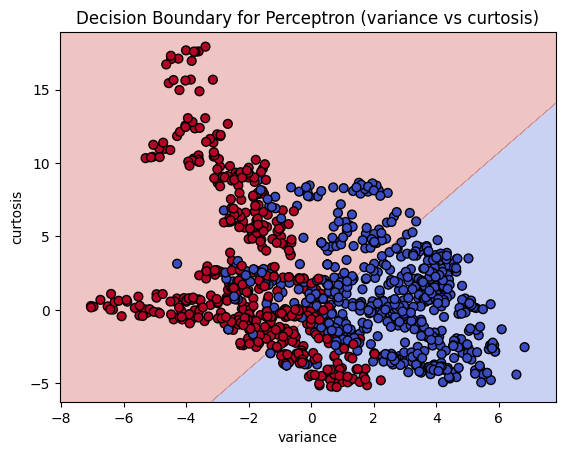




Training Accuracy with features ['skewness', 'entropy']: 0.7484047402005469



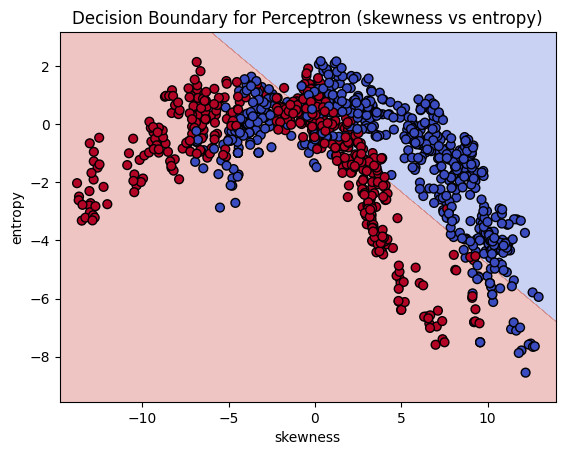

In [18]:
def plot_decision_boundary_all_pair(X, y, model, feature_names):
    # Define the range for the plot based on the feature values
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and predict class labels
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, edgecolor='k', cmap='coolwarm')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Decision Boundary for Perceptron ({feature_names[0]} vs {feature_names[1]})')
    plt.show()


def experiment_with_features(feature_pair):
    # Select the features based on the pair provided
    selected_features = X[feature_pair]
    target = y['class']

    # Split the selected features into training and validation sets
    X_train2d, X_val2d, y_train2d, y_val2d = train_test_split(selected_features, target, test_size=test_size, random_state=seed)

    # Train the Perceptron model on the training set
    perceptron2d = Perceptron(learning_rate=0.01, n_iter=100)
    perceptron2d.fit(X_train2d.values, y_train2d.values)

    # Predicting on the training data
    y_train_pred2d = perceptron2d.predict(X_train2d)
    accuracy_train = calculate_accuracy(y_train2d, y_train_pred2d)
    print(f"Training Accuracy with features {feature_pair}: {accuracy_train}\n")

    # Visualize the decision boundary for the selected features
    plot_decision_boundary_all_pair(X_train2d, y_train2d, perceptron2d, feature_pair)
    print("\n\n")


experiment_with_features(['skewness', 'variance'])
experiment_with_features(['variance', 'entropy'])
experiment_with_features(['entropy', 'curtosis'])
experiment_with_features(['variance', 'curtosis'])
experiment_with_features(['skewness', 'entropy'])



#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?

  The Perceptron algorithm's hyperplane's position and orientation are influenced by selected features and data points used during training. Different features can capture distinct patterns, altering the algorithm's classification. Combining features reshapes the input space, leading to different hyperplane configurations. The hyperplane alters to leverage instructive features for better accurate classification. Variations in data points, such as distribution, density, or proximity to the decision boundary, also affect the hyperplane's behavior, highlighting the combined influence of feature choice and input data.

2. How does the decision boundary relate to the linearly separable nature of the data?

  The Perceptron algorithm's decision boundary is determined by the linearly separable character of the data. If data points can be separated by a single line or hyperplane, the algorithm can accurately classify inputs. However, if data points are not linearly separable, the algorithm may struggle to set a sufficient decision boundary, potentially leading to misclassification or instability in the hyperplane's position. The efficiency of the decision boundary depends on the inherent properties of the feature space and data point arrangement.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [19]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""

    # Separate the data by class
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    # Calculate the mean vectors for each class
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)

    # Compute the within-class scatter matrix
    S_within = np.cov(class_0, rowvar=False) * (len(class_0) - 1) + \
               np.cov(class_1, rowvar=False) * (len(class_1) - 1)

    # Compute the between-class scatter matrix
    mean_diff = (mean_1 - mean_0).reshape(-1, 1)
    S_between = np.dot(mean_diff, mean_diff.T)

    # Calculate the projection direction using Fisher’s criterion
    S_within_inv = np.linalg.inv(S_within)
    w = np.dot(S_within_inv, mean_1 - mean_0)

    # Normalize the projection direction
    w /= np.linalg.norm(w)
    return w

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return np.dot(X, direction)

In [20]:
direction = fisher_ld_projection(X_train, y_train)

# Project the data onto the Fisher LD direction
projected_data = project_data(X_train, direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

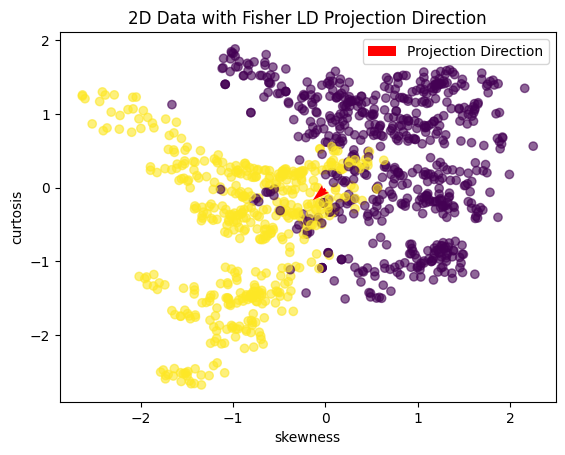

In [21]:
# Plot the 2D data with the projection direction


# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4  # Adjust this to control the length of the direction line
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
mean_all = np.mean(X_train, axis=0)
plt.quiver(mean_all[0], mean_all[1], direction[0], direction[1],
           angles='xy', scale_units='xy', scale=scale, color='red', label='Projection Direction')
plt.xlabel("skewness")
plt.ylabel("curtosis")
plt.legend()
plt.title("2D Data with Fisher LD Projection Direction")
plt.show()


Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

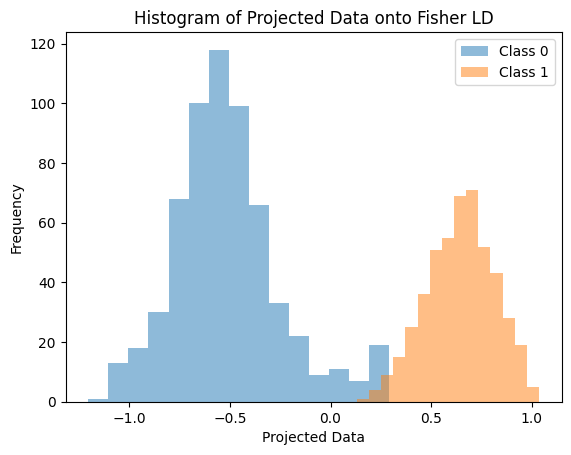

In [22]:
# Plot the histogram of the projected data
plt.hist(projected_data[y_train == 0], alpha=0.5, label='Class 0', bins=15)
plt.hist(projected_data[y_train == 1], alpha=0.5, label='Class 1', bins=15)
plt.xlabel("Projected Data")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Projected Data onto Fisher LD")
plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?

  Fisher's Linear Discriminant (LD) is a method that maximizes class separation in a one-dimensional space by optimizing the variance between classes. It effectively highlights class differences by minimal overlap. However, the degree of separation can alter depending on the original data distribution. If classes display significant overlap or share similar features, the 1D projection may not provide a precise boundary, suggesting its usefulness is limited in some contexts. Overall, Fisher's LD's effectiveness depends on the underlying distribution of classes in the original feature space.

2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

  The Perceptron's 2D space permits a better classification of data points due to its capacity to utilize both features simultaneously. It brings on a more complicated shape for data distribution. However, Fisher's 1D LD projection simplifies data into a single dimension, potentially losing information about feature relationships. It can result in overlapping points from different classes, especially if classes are not separable in the original feature space. This simplification can obscure finer distinctions, making it less accurate in the lower-dimensional projection. Despite this, Fisher's LD can effectively project data to highlight differences but may not capture the full complexity of class distributions.